# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Una opzione Europea, chiamata "Plain vanilla option" è il tipo più semplice e comune di opzione finanziaria. È un contratto derivato che dà al titolare il diritto, ma non l'obbligo, di comprare o vendere un'attività sottostante a un prezzo prestabilito entro una certa data.

Il problema è quindi decidere il prezzo dell'opzione, a questo proposito si utilizza la teoria di Black-Scholes. Questa assume che l'evoluzione temporale del prezzo di un'attività sia stocastica e mostri un moto browniano geometrico (GBM) con tasso di interesse $r$ e volatilità $\sigma$. Le assunzioni su cui si basa questa teoria sono che il mercato sia efficiente, quindi, ad esempio, liquido, e che il tasso di interesse sia costante.

La soluzione analitica della teoria di Black-Scholes per il prezzo a un tempo $t<T$ (dove $T$ è la data di consegna) è la seguente: 
- Prezzo di una call europea:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Prezzo di una put europea:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

Dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa di una gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$


In questo esercizio useremo i seguenti parametri per calcolare al tempo $t=0$, tramite metodi Monte Carlo, il prezzo di una call europea $C[S(0),0]$ (dà al titolare il diritto di comprare l'attività sottostante a un prezzo di esercizio specifico entro la data di scadenza) e di una put europea $P[S(0),0]$ (Dà al titolare il diritto di vendere l'attività sottostante a un prezzo di esercizio specifico entro la data di scadenza):
- prezzo dell'attività al tempo $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo di esercizio: $K=100$ (stesso prezzo iniziale)
- tasso di interesse: $r=0.1$
- volatilità: $\sigma=0.25$

Questo verrà fatto in due modi:
- campionando direttamente il prezzo dell'attività finale, per una $GBM(r,\sigma^2)$
- campionando la $GBM(r,\sigma^2)$ discretizzata, dividendo l'intervallo $[0,T]$ in $10^2$ intervalli di tempo: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Ricordiamo che dato un prezzo dell'asset \( S \sim GBM(\mu,\sigma^2) \), con valore iniziale \( S(0) \), allora
    $$ S(t) = S(0) \exp\left[ \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W(t) \right] $$
    dove \( W(t) \sim \mathcal{N}(0,t) \).
    Inoltre, poiché gli incrementi di \( W \) sono indipendenti e distribuiti normalmente, la procedura ricorsiva semplice per campionare i valori discretizzati di \( S \sim GBM(\mu,\sigma^2) \) ai tempi \( t_1 < t_2 < \ldots < t_n \) è:
    $$ S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu - \frac{1}{2}\sigma^2\right)(t_{i+1}-t_i) + \sigma Z_{i+1}\sqrt{t_{i+1}-t_i} \right] $$
    dove \( Z_i \sim \mathcal{N}(0,1) \).
</p>

Nelle celle seguenti possiamo vedere plottati i vari valori in funzione del numero di blocchi, dove come valore atteso è stata usata la soluzione analitica.

In [7]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)

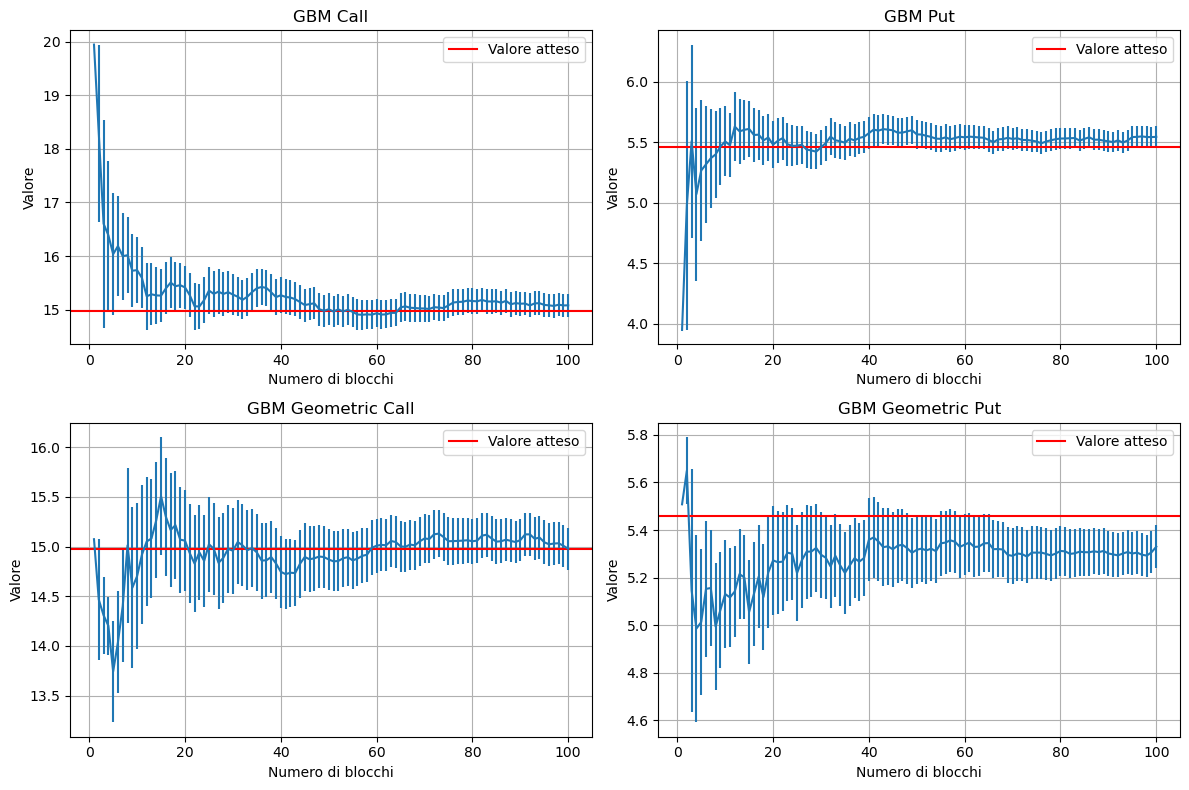

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        first_line = file.readline()
        num_columns = len(first_line.split())

    # Inizializza una lista di liste vuote per memorizzare i dati di ciascuna colonna
    data = [[] for _ in range(num_columns)]

    with open(filename, 'r') as file:  # Riapre il file per leggere tutti i dati
        for line in file:
            values = line.split()
            for i in range(num_columns):
                data[i].append(float(values[i]))
    
    return data

# Chiamata alla funzione per leggere i dati dal file
n, gbm_call, gbm_call_err, gbm_put, gbm_put_err, gbmgeom_call, gbmgeom_call_err, gbmgeom_put, gbmgeom_put_err = read_data_from_file("risultati.dat")

# Creazione dei grafici affiancati per le opzioni "call" e "put"
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grafico per GBM call
axs[0, 0].errorbar(n, np.array(gbm_call), yerr=np.array(gbm_call_err))
axs[0, 0].set_title('GBM Call')
axs[0, 0].set_xlabel('Numero di blocchi')
axs[0, 0].set_ylabel('Valore')
axs[0, 0].axhline(y=call, color='red', label='Valore atteso')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Grafico per GBM put
axs[0, 1].errorbar(n, np.array(gbm_put), yerr=np.array(gbm_put_err))
axs[0, 1].set_title('GBM Put')
axs[0, 1].set_xlabel('Numero di blocchi')
axs[0, 1].set_ylabel('Valore')
axs[0, 1].axhline(y=put, color='red', label='Valore atteso')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Grafico per GBM geom call
axs[1, 0].errorbar(n, np.array(gbmgeom_call), yerr=np.array(gbmgeom_call_err))
axs[1, 0].set_title('GBM Geometric Call')
axs[1, 0].set_xlabel('Numero di blocchi')
axs[1, 0].set_ylabel('Valore')
axs[1, 0].axhline(y=call, color='red', label='Valore atteso')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Grafico per GBM geom put
axs[1, 1].errorbar(n, np.array(gbmgeom_put), yerr=np.array(gbmgeom_put_err))
axs[1, 1].set_title('GBM Geometric Put')
axs[1, 1].set_xlabel('Numero di blocchi')
axs[1, 1].set_ylabel('Valore')
axs[1, 1].axhline(y=put, color='red', label='Valore atteso')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ottimizza il layout dei grafici
plt.tight_layout()

# Mostra i grafici affiancati
plt.show()
